## Understanding XGBoost Model on Otto Dataset

This example is ``pandas-ml`` transration based on kaggle's "Understanding XGBoost Model on Otto Dataset". To run this Jupyter Notebook, you must download data to ``otto_data`` directory.

https://github.com/dmlc/xgboost/blob/master/demo/kaggle-otto/understandingXGBoostModel.Rmd

In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 8)
pd.set_option('display.max_rows', 6)

In [2]:
import pandas_ml as pdml

In [3]:
train_df = pd.read_csv(os.path.join('otto_data', 'train.csv'), header=0, index_col=0)
test_df = pd.read_csv(os.path.join('otto_data', 'test.csv'), header=0, index_col=0)

# convert to pdml.ModelFrame
train_df = pdml.ModelFrame(train_df, target='target')
test_df = pdml.ModelFrame(test_df)
train_df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9
61877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [4]:
train_df['target'], classes = train_df['target'].factorize()
train_df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,8
61877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,8
61878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,8


In [5]:
classes

Index([u'Class_1', u'Class_2', u'Class_3', u'Class_4', u'Class_5', u'Class_6',
       u'Class_7', u'Class_8', u'Class_9'],
      dtype='object')

In [6]:
xgc = train_df.xgboost.XGBClassifier(objective="multi:softprob")
xgc

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

In [7]:
train_df.cross_validation.cross_val_score(xgc, cv=3, scoring='log_loss')

array([-0.65640179, -0.65812877, -0.65056929])

In [8]:
train_df.fit(xgc, eval_metric='mlogloss')

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

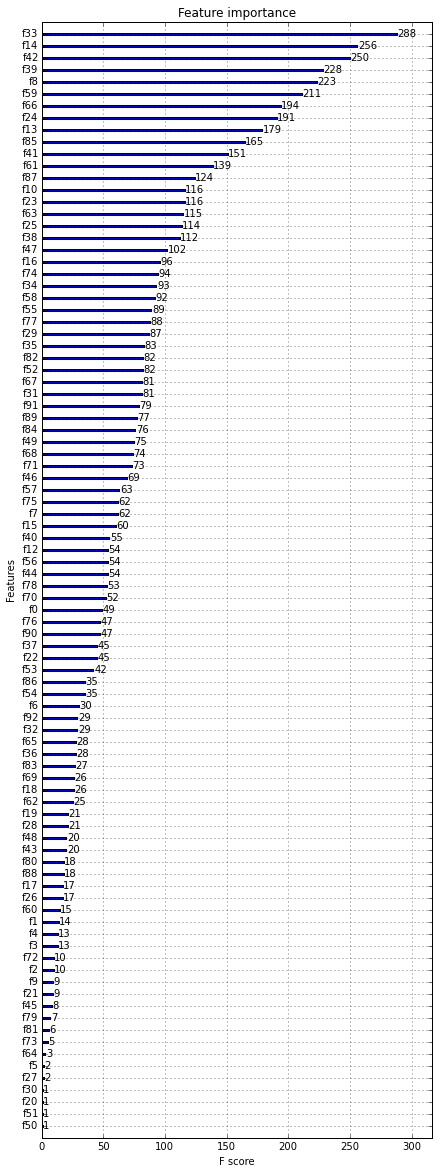

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 20))
train_df.xgboost.plot_importance(ax=ax)

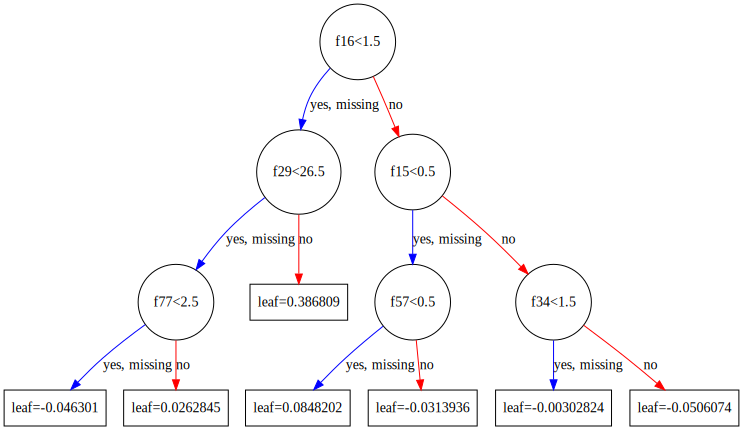

In [10]:
train_df.xgboost.to_graphviz(num_trees=0)